Aquí, inicializamos los pesos (weights) y el umbral (threshold) con valores aleatorios entre -1 y 1. Esto es importante para evitar que la red neuronal comience con todos los pesos iguales, lo que haría que el aprendizaje sea ineficiente. En este ejemplo, n_inputs es el número de entradas, y weights será un vector de pesos que se aplicarán a cada entrada.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Función de activación: en este caso utilizaremos la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función sigmoide para el cálculo del error en retropropagación
def sigmoid_derivative(x):
    return x * (1 - x)

# Parámetros iniciales
learning_rate = 0.1  # Coeficiente de aprendizaje
n_inputs = 3  # Número de entradas (esto puede variar dependiendo del problema)
n_epochs = 10000  # Número de iteraciones

#paso 1 de la imagen
# Inicializar los pesos y el umbral con valores aleatorios pequeños entre -1 y 1
weights = np.random.uniform(-1, 1, n_inputs)
threshold = np.random.uniform(-1, 1)

En este ejemplo, X representa los datos de entrada, y D es el conjunto de salidas deseadas (objetivo) para cada entrada de X. Cada fila de X es un conjunto de valores de entrada, y cada elemento de D es la salida esperada correspondiente. En un caso real, estos datos provendrían del conjunto de datos de entrenamiento.

In [10]:
#paso 2 de la imagen
# Datos de entrenamiento (ejemplo)
X = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])  # Entradas
D = np.array([0, 1, 1, 0])  # Salidas deseadas (objetivo)

# Para almacenar el error en cada época
errors = []

# Algoritmo de entrenamiento
for epoch in range(n_epochs):
    total_error = 0

    for i in range(len(X)):
        # Paso 3: Propagación
        x_i = X[i]
        y = sigmoid(np.dot(x_i, weights) - threshold)

        # Paso 4: Calcular el error
        error = D[i] - y
        total_error += error**2  # Suma de errores cuadráticos

        # Paso 5: Retropropagación (ajuste de pesos y umbral)
        weights += learning_rate * error * x_i * sigmoid_derivative(y)
        threshold -= learning_rate * error * sigmoid_derivative(y)

     # Almacenar el error total de cada época
    errors.append(total_error)

    # Condición de parada si el error es suficientemente bajo
    if total_error < 1e-5:
        print(f"Entrenamiento completado en la época {epoch}")
        break

La retropropagación es el proceso de ajustar los pesos para minimizar el error. Aquí, usamos la fórmula de ajuste de pesos que se basa en el coeficiente de aprendizaje (learning_rate), el error entre la salida deseada y la obtenida, y la derivada de la función de activación (sigmoid_derivative).

In [11]:
# Mostrar los pesos finales y el umbral
print("Pesos finales:", weights)
print("Umbral final:", threshold)

Pesos finales: [ 7.33853395 -0.1199518  -1.71888957]
Umbral final: 1.8321093906953692


In [12]:
# Prueba del modelo
for i in range(len(X)):
    y = sigmoid(np.dot(X[i], weights) - threshold)
    print(f"Entrada: {X[i]}, Salida esperada: {D[i]}, Salida predicha: {y}")

Entrada: [0 0 1], Salida esperada: 0, Salida predicha: 0.027895472002895064
Entrada: [1 1 1], Salida esperada: 1, Salida predicha: 0.9750978380543432
Entrada: [1 0 1], Salida esperada: 1, Salida predicha: 0.9778503509320664
Entrada: [0 1 1], Salida esperada: 0, Salida predicha: 0.024820521153515435


Aquí, usamos los pesos y el umbral finales para calcular la salida de cada entrada X[i] y compararla con la salida deseada D[i]. Esto muestra cómo el modelo está prediciendo después de completar el entrenamiento.

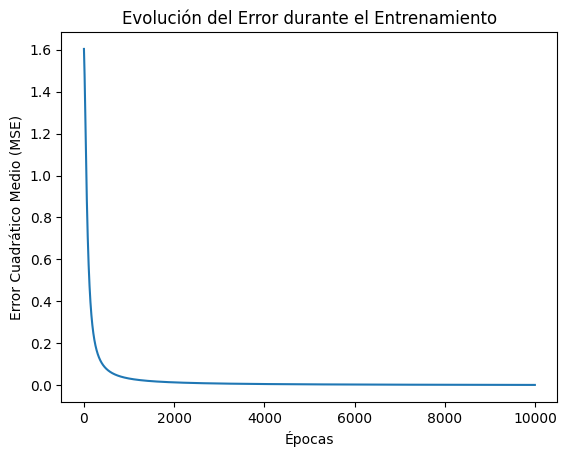

In [13]:

# Graficar el error en cada época
plt.plot(errors)
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error durante el Entrenamiento')
plt.show()

Si el error desciende rápidamente y luego se estabiliza en un valor bajo, significa que el modelo ha aprendido correctamente.

Si el error no disminuye o disminuye muy poco, puede indicar que el modelo no está aprendiendo, lo que podría deberse a una tasa de aprendizaje inadecuada, falta de complejidad en los datos o problemas en la arquitectura de la red.